##Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
from collections import defaultdict
import re
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


##Carregando os dados

Realizei o download dos dados no site da Secretaria da Saúde do Estado do Rio Grande do Sul através do link https://ti.saude.rs.gov.br/covid19/api, e então realizei o upload dos dados para o dropbox para realizar sua importação com mais facilidade.

In [ ]:
!wget --no-check-certificate 'https://www.dropbox.com/s/1lv7w2hdsm5nbwp/20211102_Ano2021.csv' -O dataset.csv 

dataset = pd.read_csv('dataset.csv', sep = ";")

dataset

--2021-11-13 02:20:14--  https://www.dropbox.com/s/1lv7w2hdsm5nbwp/20211102_Ano2021.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6027:18::a27d:4812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/1lv7w2hdsm5nbwp/20211102_Ano2021.csv [following]
--2021-11-13 02:20:14--  https://www.dropbox.com/s/raw/1lv7w2hdsm5nbwp/20211102_Ano2021.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4db388f2327c4c69a8b16a7542.dl.dropboxusercontent.com/cd/0/inline/BZ3m6-xvGqoYo_RxtwVSPB-NiGXywqLtod4zCIzJyN4KcWMZ9SP11HRU2YYcmCd-t5iTpbzWUYxHSWhlFE00Dg4dzMykT7GEKlVk71A7MJzcC4SRwrRk6bt2jTC9Wq49q2mHBrRNivGT9Z80lqHO_iCn/file# [following]
--2021-11-13 02:20:14--  https://uc4db388f2327c4c69a8b16a7542.dl.dropboxusercontent.com/cd/0/inline/BZ3m6-xvGqoYo_RxtwVSPB-NiGXywqLtod4zCIzJyN4KcWMZ9SP11HRU2YYcmCd

,COD_IBGE,MUNICIPIO,COD_REGIAO_COVID,REGIAO_COVID,SEXO,FAIXAETARIA,CRITERIO,DATA_CONFIRMACAO,DATA_SINTOMAS,DATA_INCLUSAO,DATA_EVOLUCAO,EVOLUCAO,HOSPITALIZADO,FEBRE,TOSSE,GARGANTA,DISPNEIA,OUTROS,CONDICOES,GESTANTE,DATA_INCLUSAO_OBITO,DATA_EVOLUCAO_ESTIMADA,RACA_COR,ETNIA_INDIGENA,PROFISSIONAL_SAUDE,BAIRRO,SRAG,FONTE_INFORMACAO,PAIS_NASCIMENTO,PES_PRIV_LIBERDADE
0,430003,ACEGUÁ,16,BAGE - R22,Feminino,15 a 19,TESTE RÁPIDO,29/03/2021,28/03/2021,31/03/2021,NaN,RECUPERADO,NAO,SIM,SIM,SIM,NAO,NAO,NaN,NAO,NaN,11/04/2021,BRANCA,NAO ENCONTRADO,NAO,ZONA RURAL,NAO,E-SUS,BRASIL,NAO
1,430003,ACEGUÁ,16,BAGE - R22,Masculino,70 a 79,TESTE RÁPIDO,26/03/2021,22/03/2021,31/03/2021,NaN,RECUPERADO,NAO,NAO,SIM,NAO,NAO,NAO,Doenças cardíacas crônicas,NAO,NaN,05/04/2021,PARDA,NAO ENCONTRADO,NAO,COLONIA NOVA,NAO,E-SUS,BRASIL,NAO
2,430003,ACEGUÁ,16,BAGE - R22,Feminino,50 a 59,TESTE RÁPIDO,26/03/2021,22/03/2021,30/03/2021,NaN,RECUPERADO,NAO,NAO,SIM,NAO,NAO,SIM,NaN,NAO,NaN,05/04/2021,PRETA,NAO ENCONTRADO,NAO,ZONA RURAL,NAO,E-SUS,BRASIL,NAO
3,430003,ACEGUÁ,16,BAGE - R22,Feminino,70 a 79,TESTE RÁPIDO,27/03/2021,27/03/2021,30/03/2021,NaN,RECUPERADO,NAO,NAO,NAO,NAO,NAO,NAO,Doenças cardíacas crônicas,NAO,NaN,10/04/2021,BRANCA,NAO ENCONTRADO,NAO,ZONA RURAL,NAO,E-SUS,BRASIL,NAO
4,430003,ACEGUÁ,16,BAGE - R22,Feminino,30 a 39,TESTE RÁPIDO,29/03/2021,29/03/2021,31/03/2021,NaN,RECUPERADO,NAO,NAO,NAO,NAO,NAO,NAO,NaN,NAO,NaN,12/04/2021,BRANCA,NAO ENCONTRADO,NAO,ZONA RURAL,NAO,E-SUS,BRASIL,NAO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941932,432380,XANGRI-LÁ,3,CAPAO DA CANOA - R04 R05,Feminino,30 a 39,TESTE RÁPIDO,07/03/2021,05/03/2021,10/04/2021,NaN,RECUPERADO,NAO,NAO,SIM,NAO,NAO,SIM,NaN,NAO,NaN,19/03/2021,BRANCA,NAO ENCONTRADO,NAO,GUARA,NAO,E-SUS,BRASIL,NAO
941933,432380,XANGRI-LÁ,3,CAPAO DA CANOA - R04 R05,Masculino,30 a 39,TESTE RÁPIDO,26/02/2021,24/02/2021,10/04/2021,NaN,RECUPERADO,NAO,NAO,NAO,NAO,NAO,NAO,NaN,NAO,NaN,10/03/2021,NAO INFORMADO,NAO ENCONTRADO,NAO,CENTRO,NAO,E-SUS,BRASIL,NAO
941934,432380,XANGRI-LÁ,3,CAPAO DA CANOA - R04 R05,Feminino,40 a 49,TESTE RÁPIDO,23/02/2021,17/02/2021,10/04/2021,NaN,RECUPERADO,NAO,NAO,NAO,SIM,NAO,NAO,NaN,NAO,NaN,03/03/2021,BRANCA,NAO ENCONTRADO,NAO,CENTRO,NAO,E-SUS,BRASIL,NAO
941935,432380,XANGRI-LÁ,3,CAPAO DA CANOA - R04 R05,Feminino,40 a 49,RT-PCR,04/02/2021,01/02/2021,10/04/2021,NaN,RECUPERADO,NAO,NAO,NAO,NAO,NAO,NAO,NaN,NAO,NaN,15/02/2021,NAO INFORMADO,NAO ENCONTRADO,NAO,CENTRO,NAO,E-SUS,BRASIL,NAO


##Pré-processamento dos dados

Nessa etapa irei lidar com os dados realizando as transformações necessárias para realizar seu o uso nos modelos

###Valores categóricos 

Primeiro irei analisar quais colunas possuem valores categóricos, e posteriormente irei decidir o que fazer com cada uma delas.

In [ ]:
categoricos = dataset.select_dtypes(include=["object"]).columns
numericos = dataset.select_dtypes(exclude = ["object"]).columns
print(categoricos)
print('-------------')
print(numericos)

Index(['MUNICIPIO', 'REGIAO_COVID', 'SEXO', 'FAIXAETARIA', 'CRITERIO',
       'DATA_CONFIRMACAO', 'DATA_SINTOMAS', 'DATA_INCLUSAO', 'DATA_EVOLUCAO',
       'EVOLUCAO', 'HOSPITALIZADO', 'FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA',
       'OUTROS', 'CONDICOES', 'GESTANTE', 'DATA_INCLUSAO_OBITO',
       'DATA_EVOLUCAO_ESTIMADA', 'RACA_COR', 'ETNIA_INDIGENA',
       'PROFISSIONAL_SAUDE', 'BAIRRO', 'SRAG', 'FONTE_INFORMACAO',
       'PAIS_NASCIMENTO', 'PES_PRIV_LIBERDADE'],
      dtype='object')
-------------
Index(['COD_IBGE', 'COD_REGIAO_COVID'], dtype='object')


####Lidando com as datas

Ao observar que o conjunto dos dados possui várias colunas que são datas mas estão representadas como strings. Então irei converter estas strings para suas datas reais.

In [ ]:
dataset["DATA_CONFIRMACAO"] = pd.to_datetime(dataset["DATA_CONFIRMACAO"], format="%d/%m/%Y")
dataset["DATA_SINTOMAS"] = pd.to_datetime(dataset["DATA_SINTOMAS"], format="%d/%m/%Y")
dataset["DATA_INCLUSAO"] = pd.to_datetime(dataset["DATA_EVOLUCAO"], format="%d/%m/%Y")
dataset["DATA_EVOLUCAO"] = pd.to_datetime(dataset["DATA_EVOLUCAO"], format="%d/%m/%Y")
dataset["DATA_INCLUSAO_OBITO"] = pd.to_datetime(dataset["DATA_INCLUSAO_OBITO"], format="%d/%m/%Y")
dataset["DATA_EVOLUCAO_ESTIMADA"] = pd.to_datetime(dataset["DATA_EVOLUCAO_ESTIMADA"], format="%d/%m/%Y")
dataset.head()

,COD_IBGE,MUNICIPIO,COD_REGIAO_COVID,REGIAO_COVID,SEXO,FAIXAETARIA,CRITERIO,DATA_CONFIRMACAO,DATA_SINTOMAS,DATA_INCLUSAO,DATA_EVOLUCAO,EVOLUCAO,HOSPITALIZADO,FEBRE,TOSSE,GARGANTA,DISPNEIA,OUTROS,CONDICOES,GESTANTE,DATA_INCLUSAO_OBITO,DATA_EVOLUCAO_ESTIMADA,RACA_COR,ETNIA_INDIGENA,PROFISSIONAL_SAUDE,BAIRRO,SRAG,FONTE_INFORMACAO,PAIS_NASCIMENTO,PES_PRIV_LIBERDADE
0,430003,ACEGUÁ,16,BAGE - R22,Feminino,15 a 19,TESTE RÁPIDO,2021-03-29,2021-03-28,NaT,NaT,RECUPERADO,NAO,SIM,SIM,SIM,NAO,NAO,NaN,NAO,NaT,2021-04-11,BRANCA,NAO ENCONTRADO,NAO,ZONA RURAL,NAO,E-SUS,BRASIL,NAO
1,430003,ACEGUÁ,16,BAGE - R22,Masculino,70 a 79,TESTE RÁPIDO,2021-03-26,2021-03-22,NaT,NaT,RECUPERADO,NAO,NAO,SIM,NAO,NAO,NAO,Doenças cardíacas crônicas,NAO,NaT,2021-04-05,PARDA,NAO ENCONTRADO,NAO,COLONIA NOVA,NAO,E-SUS,BRASIL,NAO
2,430003,ACEGUÁ,16,BAGE - R22,Feminino,50 a 59,TESTE RÁPIDO,2021-03-26,2021-03-22,NaT,NaT,RECUPERADO,NAO,NAO,SIM,NAO,NAO,SIM,NaN,NAO,NaT,2021-04-05,PRETA,NAO ENCONTRADO,NAO,ZONA RURAL,NAO,E-SUS,BRASIL,NAO
3,430003,ACEGUÁ,16,BAGE - R22,Feminino,70 a 79,TESTE RÁPIDO,2021-03-27,2021-03-27,NaT,NaT,RECUPERADO,NAO,NAO,NAO,NAO,NAO,NAO,Doenças cardíacas crônicas,NAO,NaT,2021-04-10,BRANCA,NAO ENCONTRADO,NAO,ZONA RURAL,NAO,E-SUS,BRASIL,NAO
4,430003,ACEGUÁ,16,BAGE - R22,Feminino,30 a 39,TESTE RÁPIDO,2021-03-29,2021-03-29,NaT,NaT,RECUPERADO,NAO,NAO,NAO,NAO,NAO,NAO,NaN,NAO,NaT,2021-04-12,BRANCA,NAO ENCONTRADO,NAO,ZONA RURAL,NAO,E-SUS,BRASIL,NAO


###Valores Faltantes

In [ ]:
def quantifica_nans():
  rows = []
  for column in dataset.columns:
    row = {'coluna': column, 'nans': dataset[column].isnull().sum(), 'frac_nans': dataset[column].isnull().sum() / dataset.shape[0]}
    rows.append(row)
  res = pd.DataFrame(rows)
  res = res[res.nans>0].sort_values('nans', ascending=False)
  
  return res

In [ ]:
quantifica_nans()

,coluna,nans,frac_nans
20,DATA_INCLUSAO_OBITO,916948,0.973471
9,DATA_INCLUSAO,871052,0.924745
10,DATA_EVOLUCAO,871052,0.924745
18,CONDICOES,821042,0.871653
21,DATA_EVOLUCAO_ESTIMADA,74921,0.079539
23,ETNIA_INDIGENA,20470,0.021732
28,PAIS_NASCIMENTO,20470,0.021732
16,DISPNEIA,3787,0.004020
25,BAIRRO,28,0.000030


as colunas ETNIA_INDIGENA, PAIS_NASCIMENTO, DISPNEIA e BAIRRO possuem poucos valores nans avaliando sua fração, mas caso fosse retirado todas essas linhas, seria perdido uma quantidade consideravel de informação.

Como possível solução, será adicionado um valor novo aos valores NaNs, indicando que seu valor é NÃO INFORMADO.

Mas antes disso, é interessante verificar se esse valor NÃO INFORMADO (ou algo próximo) já existe nessas colunas. Em caso positivo, podemos mapear os NaNs para essas colunas.

####Etnia-Indigena

In [ ]:
dataset['ETNIA_INDIGENA'].value_counts()

NAO ENCONTRADO                                                             920581
KAINGANG (CAINGANGUE)                                                         779
GUARANI M BYA                                                                  34
GUARANI                                                                        20
ACONA (WAKONAS, NACONAS, JAKONA, ACORANES)                                     10
TERENA                                                                          4
GUARANI KAIOWA (PAI TAVYTERA)                                                   4
AJURU                                                                           4
PANKARARU (PANCARARU)                                                           3
ANAMBE                                                                          3
AIKANA (AIKANA, MAS SAKA,TUBARAO)                                               3
GUARANI NANDEVA (AVAKATUETE, CHIRIPA, NHANDEWA, AVA GUARANI)                    3
GUAJAJARA (TENET

Como possuimos uma categoria não encontrado irei converter os NaN para ela.

In [ ]:
dataset['ETNIA_INDIGENA'] = dataset['ETNIA_INDIGENA'].fillna("NAO ENCONTRADO")
quantifica_nans()

,coluna,nans,frac_nans
20,DATA_INCLUSAO_OBITO,916948,0.973471
9,DATA_INCLUSAO,871052,0.924745
10,DATA_EVOLUCAO,871052,0.924745
18,CONDICOES,821042,0.871653
21,DATA_EVOLUCAO_ESTIMADA,74921,0.079539
28,PAIS_NASCIMENTO,20470,0.021732
16,DISPNEIA,3787,0.004020
25,BAIRRO,28,0.000030


####Pais Nascimento

In [ ]:
dataset['PAIS_NASCIMENTO'].value_counts()

BRASIL                904511
NAO ENCONTRADO         13988
REPUBLICA DO HAITI       847
VENEZUELA                733
URUGUAI                  442
                       ...  
TCHECOSLOVAQUIA            1
UCRANIA                    1
MAYOTTE, ILHA              1
CONGO                      1
LETONIA                    1
Name: PAIS_NASCIMENTO, Length: 80, dtype: int64

Como também possuimos uma categoria não encontrado irei converter os NaNs para ela.

In [ ]:
dataset['PAIS_NASCIMENTO'] = dataset['PAIS_NASCIMENTO'].fillna("NAO ENCONTRADO")
quantifica_nans()

,coluna,nans,frac_nans
20,DATA_INCLUSAO_OBITO,916948,0.973471
9,DATA_INCLUSAO,871052,0.924745
10,DATA_EVOLUCAO,871052,0.924745
18,CONDICOES,821042,0.871653
21,DATA_EVOLUCAO_ESTIMADA,74921,0.079539
16,DISPNEIA,3787,0.004020
25,BAIRRO,28,0.000030


####Dispneia

In [ ]:
dataset['DISPNEIA'].value_counts()

NAO    804282
SIM    133868
Name: DISPNEIA, dtype: int64

Nesse caso não possuimos uma categoria parecida com "não encontrado" então irei criar uma coluna adicional para os valores NaN.

In [ ]:
dataset['DISPNEIA'] = dataset['DISPNEIA'].fillna("NAO ENCONTRADO")
quantifica_nans()

,coluna,nans,frac_nans
20,DATA_INCLUSAO_OBITO,916948,0.973471
9,DATA_INCLUSAO,871052,0.924745
10,DATA_EVOLUCAO,871052,0.924745
18,CONDICOES,821042,0.871653
21,DATA_EVOLUCAO_ESTIMADA,74921,0.079539
25,BAIRRO,28,0.000030


####Bairro

Como possuimos muitas opções diferentes informadas para a categoria bairro, irei filtrar apenas as que começam com não, para assim tentar identificar alguma que seja equivalente a não informado para então mapear os NaNs para ela.

In [ ]:
values = sorted([i for i in dataset['BAIRRO'].value_counts().index if i[:3] == 'NAO'])
values

['NAO',
 'NAO ',
 'NAO COLOCOU',
 'NAO CONSTA',
 'NAO CONSTA ',
 'NAO DECLARADO',
 'NAO ENCONTRADA',
 'NAO ESPECIFICADO',
 'NAO ESPECIFICOU ',
 'NAO HA',
 'NAO IDENTIFICADO',
 'NAO IDENTIFICADO ',
 'NAO IDENTIFICOU',
 'NAO INDOEMADO',
 'NAO INF',
 'NAO INF ',
 'NAO INF.',
 'NAO INFO',
 "NAO INFO'",
 'NAO INFOMRADO',
 'NAO INFORMADO',
 'NAO INFORMADO ',
 'NAO INFORMADP',
 'NAO INFORMOU',
 'NAO INFORNADO',
 'NAO INFROMADO',
 'NAO IONFORMADO',
 'NAO POSSUI ENDEREÇO',
 'NAO SABE',
 'NAO SABE ',
 'NAO SABE INFORMAR',
 'NAO SE APLICA',
 'NAO SEI',
 'NAO SEI ',
 'NAO SOUBE ',
 'NAO TEM',
 'NAOL']

Podemos ver que existem várias categorias equivalentes a não informado, então tentarei mapear todas elas para uma única categoria.

In [ ]:
dataset['BAIRRO']= dataset['BAIRRO'].replace(values,'NAO INFORMADO')
dataset['BAIRRO'] = dataset['BAIRRO'].fillna('NAO INFORMADO')
quantifica_nans()

,coluna,nans,frac_nans
20,DATA_INCLUSAO_OBITO,916948,0.973471
9,DATA_INCLUSAO,871052,0.924745
10,DATA_EVOLUCAO,871052,0.924745
18,CONDICOES,821042,0.871653
21,DATA_EVOLUCAO_ESTIMADA,74921,0.079539


####Condições

In [ ]:
dataset['CONDICOES'].value_counts()

Doenças cardíacas crônicas                                                                                                       24003
Doenças respiratórias crônicas descompensadas                                                                                    11653
Outros                                                                                                                            9328
Diabetes                                                                                                                          8133
Doença Cardiovascular Crônica                                                                                                     7532
                                                                                                                                 ...  
Doenças cardíacas crônicas, Diabetes, Imunossupressão, Portador de doenças cromossômicas ou estado de fragilidade imunológica        1
Gestante, Doença Cardiovascular Crônica, Asma          

Podemos perceber que exitem muitos valores encontrados em condições, porém podemos ver que existem múltiplos valores em uma coluna, sendo dividos por vírgulas. Como alternativa irei dividir pela virgula e verificar a quantidade de condições únicas encontradas. E depois listas por ordem alfabética para melhor visualização

In [ ]:
condicoes_dict = defaultdict(int)

for value in dataset['CONDICOES'].fillna('nan').values:
  for s in re.split(r',\s*(?![^()]*\))', value):
    condicoes_dict[s.strip()] += 1

sorted(list(condicoes_dict.items()), key=lambda x: x[0])

[('Asm', 1),
 ('Asma', 2757),
 ('Diabetes', 16405),
 ('Diabetes mellitu', 40),
 ('Diabetes mellitus', 16622),
 ('Doença Cardiovascular Crônica', 24718),
 ('Doença Hematológica Crônic', 97),
 ('Doença Hematológica Crônica', 354),
 ('Doença Hepática Crônic', 1),
 ('Doença Hepática Crônica', 634),
 ('Doença Neurológica Crônic', 10),
 ('Doença Neurológica Crônica', 3012),
 ('Doença Renal Crônic', 14),
 ('Doença Renal Crônica', 2176),
 ('Doenças cardíacas crônicas', 33877),
 ('Doenças cardíacas crônicas descompensadas', 1),
 ('Doenças renais crônicas em estágio avançado (graus 3, 4 ou 5)', 1237),
 ('Doenças respiratórias crônicas descompensadas', 14418),
 ('Gestante', 4903),
 ('Imunodeficiênci', 34),
 ('Imunodeficiência', 1860),
 ('Imunossupressão', 3198),
 ('Obesidad', 36),
 ('Obesidade', 16850),
 ('Outra Pneumatopatia Crônic', 9),
 ('Outra Pneumatopatia Crônica', 2665),
 ('Outro', 208),
 ('Outros', 25229),
 ('Pneumatopatia Crônica', 120),
 ('Portador de doenças cromossômicas ou estado de 


Existem muitos valores que representam a mesma coisa mas possuem uma letra faltando no fim. Para isso, será criado um dicionário para poder ser feito a conversão corretamente. E por fim verificarei quantas possiveis condições possuimos de fato.

In [ ]:
conversao_condicoes = {}
condicoes = sorted(list(condicoes_dict.keys()))

for i in range(len(condicoes) - 1):
  if condicoes[i] != condicoes[i+1][:-1]:
    conversao_condicoes[condicoes[i]] = condicoes[i]
  else:
    conversao_condicoes[condicoes[i]] = condicoes[i+1]

conversao_condicoes['nan'] = 'nan'

conversao_condicoes

condicoes_possiveis = list(set(conversao_condicoes.values()))
len(condicoes_possiveis)

24

Como alternativa irei criar uma codificação One Hot, onde cada coluna vai indicar a presença ou não dessas condições.

In [ ]:
dataset.index = pd.RangeIndex(len(dataset.index))

cod = LabelBinarizer()
cod.fit(condicoes_possiveis)

one_hot_values = []

for i, value in enumerate(dataset['CONDICOES'].fillna('nan').values):  
  one_hot_value = np.zeros((1,24))

  for s in re.split(r',\s*(?![^()]*\))', value):
    valor = conversao_condicoes[s.strip()]
    one_hot_value += cod.transform([valor]) 

  one_hot_values.append(one_hot_value)

one_hot_values = np.concatenate(one_hot_values)
onehot = pd.DataFrame(one_hot_values)
onehot.columns = ['CONDICAO=' + column.upper() for column in cod.classes_]

dataset = pd.concat([dataset, onehot], axis=1).drop(['CONDICOES'], axis=1)

In [ ]:
dataset.head()

,COD_IBGE,MUNICIPIO,COD_REGIAO_COVID,REGIAO_COVID,SEXO,FAIXAETARIA,CRITERIO,DATA_CONFIRMACAO,DATA_SINTOMAS,DATA_INCLUSAO,DATA_EVOLUCAO,EVOLUCAO,HOSPITALIZADO,FEBRE,TOSSE,GARGANTA,DISPNEIA,OUTROS,GESTANTE,DATA_INCLUSAO_OBITO,DATA_EVOLUCAO_ESTIMADA,RACA_COR,ETNIA_INDIGENA,PROFISSIONAL_SAUDE,BAIRRO,SRAG,FONTE_INFORMACAO,PAIS_NASCIMENTO,PES_PRIV_LIBERDADE,CONDICAO=ASMA,CONDICAO=DIABETES,CONDICAO=DIABETES MELLITUS,CONDICAO=DOENÇA CARDIOVASCULAR CRÔNICA,CONDICAO=DOENÇA HEMATOLÓGICA CRÔNICA,CONDICAO=DOENÇA HEPÁTICA CRÔNICA,CONDICAO=DOENÇA NEUROLÓGICA CRÔNICA,CONDICAO=DOENÇA RENAL CRÔNICA,CONDICAO=DOENÇAS CARDÍACAS CRÔNICAS,CONDICAO=DOENÇAS CARDÍACAS CRÔNICAS DESCOMPENSADAS,"CONDICAO=DOENÇAS RENAIS CRÔNICAS EM ESTÁGIO AVANÇADO (GRAUS 3, 4 OU 5)",CONDICAO=DOENÇAS RESPIRATÓRIAS CRÔNICAS DESCOMPENSADAS,CONDICAO=GESTANTE,CONDICAO=IMUNODEFICIÊNCIA,CONDICAO=IMUNOSSUPRESSÃO,CONDICAO=OBESIDADE,CONDICAO=OUTRA PNEUMATOPATIA CRÔNICA,CONDICAO=OUTROS,CONDICAO=PNEUMATOPATIA CRÔNICA,CONDICAO=PORTADOR DE DOENÇAS CROMOSSÔMICAS OU ESTADO DE FRAGILIDADE IMUNOLÓGICA,CONDICAO=PUÉRPERA,CONDICAO=PUÉRPERA (ATÉ 45 DIAS DO PARTO),CONDICAO=SÍNDROME DE DOWN,CONDICAO=NAN
0,430003,ACEGUÁ,16,BAGE - R22,Feminino,15 a 19,TESTE RÁPIDO,2021-03-29,2021-03-28,NaT,NaT,RECUPERADO,NAO,SIM,SIM,SIM,NAO,NAO,NAO,NaT,2021-04-11,BRANCA,NAO ENCONTRADO,NAO,ZONA RURAL,NAO,E-SUS,BRASIL,NAO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,430003,ACEGUÁ,16,BAGE - R22,Masculino,70 a 79,TESTE RÁPIDO,2021-03-26,2021-03-22,NaT,NaT,RECUPERADO,NAO,NAO,SIM,NAO,NAO,NAO,NAO,NaT,2021-04-05,PARDA,NAO ENCONTRADO,NAO,COLONIA NOVA,NAO,E-SUS,BRASIL,NAO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,430003,ACEGUÁ,16,BAGE - R22,Feminino,50 a 59,TESTE RÁPIDO,2021-03-26,2021-03-22,NaT,NaT,RECUPERADO,NAO,NAO,SIM,NAO,NAO,SIM,NAO,NaT,2021-04-05,PRETA,NAO ENCONTRADO,NAO,ZONA RURAL,NAO,E-SUS,BRASIL,NAO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,430003,ACEGUÁ,16,BAGE - R22,Feminino,70 a 79,TESTE RÁPIDO,2021-03-27,2021-03-27,NaT,NaT,RECUPERADO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NaT,2021-04-10,BRANCA,NAO ENCONTRADO,NAO,ZONA RURAL,NAO,E-SUS,BRASIL,NAO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,430003,ACEGUÁ,16,BAGE - R22,Feminino,30 a 39,TESTE RÁPIDO,2021-03-29,2021-03-29,NaT,NaT,RECUPERADO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NaT,2021-04-12,BRANCA,NAO ENCONTRADO,NAO,ZONA RURAL,NAO,E-SUS,BRASIL,NAO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
quantifica_nans()

,coluna,nans,frac_nans
19,DATA_INCLUSAO_OBITO,916948,0.973471
9,DATA_INCLUSAO,871052,0.924745
10,DATA_EVOLUCAO,871052,0.924745
20,DATA_EVOLUCAO_ESTIMADA,74921,0.079539


Com isso ficamos apenas com NaNs nas datas, como váriaveis com datas são difíceis de serem integradas aos modelos, possívelmente irei remove-lás mas antes de realizar a remoção tentarei derivar algum atributo util por meio das datas.

###Criação de colunas

####Dias até confirmação

Um atributo possível de ser derivado por meio das datas seria quantos dias se passaram desde que os sintomas se iniciaram até a confirmação de Covid.

In [ ]:
dataset['DIAS_ATE_CONFIRMACAO'] = (dataset["DATA_CONFIRMACAO"] - dataset["DATA_SINTOMAS"])
dataset['DIAS_ATE_CONFIRMACAO'] /= np.timedelta64(1, 'D')

###Exclusão de colunas

Nessa seção irei avaliar quais colunas podem ser removidas por não conterem informações relevantes para os modelos que irei testar posteriormente.

In [ ]:
dataset.head()

,COD_IBGE,MUNICIPIO,COD_REGIAO_COVID,REGIAO_COVID,SEXO,FAIXAETARIA,CRITERIO,DATA_CONFIRMACAO,DATA_SINTOMAS,DATA_INCLUSAO,DATA_EVOLUCAO,EVOLUCAO,HOSPITALIZADO,FEBRE,TOSSE,GARGANTA,DISPNEIA,OUTROS,GESTANTE,DATA_INCLUSAO_OBITO,DATA_EVOLUCAO_ESTIMADA,RACA_COR,ETNIA_INDIGENA,PROFISSIONAL_SAUDE,BAIRRO,SRAG,FONTE_INFORMACAO,PAIS_NASCIMENTO,PES_PRIV_LIBERDADE,CONDICAO=ASMA,CONDICAO=DIABETES,CONDICAO=DIABETES MELLITUS,CONDICAO=DOENÇA CARDIOVASCULAR CRÔNICA,CONDICAO=DOENÇA HEMATOLÓGICA CRÔNICA,CONDICAO=DOENÇA HEPÁTICA CRÔNICA,CONDICAO=DOENÇA NEUROLÓGICA CRÔNICA,CONDICAO=DOENÇA RENAL CRÔNICA,CONDICAO=DOENÇAS CARDÍACAS CRÔNICAS,CONDICAO=DOENÇAS CARDÍACAS CRÔNICAS DESCOMPENSADAS,"CONDICAO=DOENÇAS RENAIS CRÔNICAS EM ESTÁGIO AVANÇADO (GRAUS 3, 4 OU 5)",CONDICAO=DOENÇAS RESPIRATÓRIAS CRÔNICAS DESCOMPENSADAS,CONDICAO=GESTANTE,CONDICAO=IMUNODEFICIÊNCIA,CONDICAO=IMUNOSSUPRESSÃO,CONDICAO=OBESIDADE,CONDICAO=OUTRA PNEUMATOPATIA CRÔNICA,CONDICAO=OUTROS,CONDICAO=PNEUMATOPATIA CRÔNICA,CONDICAO=PORTADOR DE DOENÇAS CROMOSSÔMICAS OU ESTADO DE FRAGILIDADE IMUNOLÓGICA,CONDICAO=PUÉRPERA,CONDICAO=PUÉRPERA (ATÉ 45 DIAS DO PARTO),CONDICAO=SÍNDROME DE DOWN,CONDICAO=NAN,DIAS_ATE_CONFIRMACAO
0,430003,ACEGUÁ,16,BAGE - R22,Feminino,15 a 19,TESTE RÁPIDO,2021-03-29,2021-03-28,NaT,NaT,RECUPERADO,NAO,SIM,SIM,SIM,NAO,NAO,NAO,NaT,2021-04-11,BRANCA,NAO ENCONTRADO,NAO,ZONA RURAL,NAO,E-SUS,BRASIL,NAO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,430003,ACEGUÁ,16,BAGE - R22,Masculino,70 a 79,TESTE RÁPIDO,2021-03-26,2021-03-22,NaT,NaT,RECUPERADO,NAO,NAO,SIM,NAO,NAO,NAO,NAO,NaT,2021-04-05,PARDA,NAO ENCONTRADO,NAO,COLONIA NOVA,NAO,E-SUS,BRASIL,NAO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
2,430003,ACEGUÁ,16,BAGE - R22,Feminino,50 a 59,TESTE RÁPIDO,2021-03-26,2021-03-22,NaT,NaT,RECUPERADO,NAO,NAO,SIM,NAO,NAO,SIM,NAO,NaT,2021-04-05,PRETA,NAO ENCONTRADO,NAO,ZONA RURAL,NAO,E-SUS,BRASIL,NAO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0
3,430003,ACEGUÁ,16,BAGE - R22,Feminino,70 a 79,TESTE RÁPIDO,2021-03-27,2021-03-27,NaT,NaT,RECUPERADO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NaT,2021-04-10,BRANCA,NAO ENCONTRADO,NAO,ZONA RURAL,NAO,E-SUS,BRASIL,NAO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,430003,ACEGUÁ,16,BAGE - R22,Feminino,30 a 39,TESTE RÁPIDO,2021-03-29,2021-03-29,NaT,NaT,RECUPERADO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NaT,2021-04-12,BRANCA,NAO ENCONTRADO,NAO,ZONA RURAL,NAO,E-SUS,BRASIL,NAO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Essas colunas serão excluidas
eliminate_columns = [
  'COD_IBGE', # Não vejo maneira de utilizar
  'MUNICIPIO', # Muitos valores possiveis
  'COD_REGIAO_COVID', # Muitos valores possiveis
  'REGIAO_COVID', # Muitos valores possiveis
  'CRITERIO', # Não vejo maneira de utilizar
  'DATA_CONFIRMACAO', # Já derivei atributo dessa coluna
  'DATA_SINTOMAS', # Já derivei atributo dessa coluna
  'DATA_INCLUSAO', # Muitos dados nulos
  'DATA_EVOLUCAO', # Muitos dados nulos
  'EVOLUCAO', # Pode ter vazamento de informação
  'DATA_INCLUSAO_OBITO', # Vazamento de informação
  'DATA_EVOLUCAO_ESTIMADA', # Informação estimada
  'ETNIA_INDIGENA', # Muitos valores não encontrados, visto que poucas pessoas possuem etnia indigena
  'BAIRRO', # Muitos valores possiveis
  'FONTE_INFORMACAO', # Não vejo maneira de utilizar
  'PAIS_NASCIMENTO', # Muitos valores possiveis
  'PES_PRIV_LIBERDADE', # Não vejo maneira de utilizar
  'SRAG', # Vazamento de informação
  'CONDICAO=GESTANTE', # Já possuímos no dataset uma coluna gestante
  'CONDICAO=OUTROS', # Já possuímos no dataset uma coluna outros
  'CONDICAO=NAN', # Essa informação indica que não tem condições
]

dataset = dataset.drop(eliminate_columns, axis=1)

###Transformando colunas categóricas

Nesse momento irei avaliar as colunas e decidir que tipo de transformação irei fazer nelas, minha idéia é fazer um mapeamento nas que possuam alguma relação de ordem entre os possíveis valores, nas que forem sim ou não uma transformação simples para 1 e 0 e aplicarei one-hot nas demais.

In [ ]:
dataset.head()

,SEXO,FAIXAETARIA,HOSPITALIZADO,FEBRE,TOSSE,GARGANTA,DISPNEIA,OUTROS,GESTANTE,RACA_COR,PROFISSIONAL_SAUDE,CONDICAO=ASMA,CONDICAO=DIABETES,CONDICAO=DIABETES MELLITUS,CONDICAO=DOENÇA CARDIOVASCULAR CRÔNICA,CONDICAO=DOENÇA HEMATOLÓGICA CRÔNICA,CONDICAO=DOENÇA HEPÁTICA CRÔNICA,CONDICAO=DOENÇA NEUROLÓGICA CRÔNICA,CONDICAO=DOENÇA RENAL CRÔNICA,CONDICAO=DOENÇAS CARDÍACAS CRÔNICAS,CONDICAO=DOENÇAS CARDÍACAS CRÔNICAS DESCOMPENSADAS,"CONDICAO=DOENÇAS RENAIS CRÔNICAS EM ESTÁGIO AVANÇADO (GRAUS 3, 4 OU 5)",CONDICAO=DOENÇAS RESPIRATÓRIAS CRÔNICAS DESCOMPENSADAS,CONDICAO=IMUNODEFICIÊNCIA,CONDICAO=IMUNOSSUPRESSÃO,CONDICAO=OBESIDADE,CONDICAO=OUTRA PNEUMATOPATIA CRÔNICA,CONDICAO=PNEUMATOPATIA CRÔNICA,CONDICAO=PORTADOR DE DOENÇAS CROMOSSÔMICAS OU ESTADO DE FRAGILIDADE IMUNOLÓGICA,CONDICAO=PUÉRPERA,CONDICAO=PUÉRPERA (ATÉ 45 DIAS DO PARTO),CONDICAO=SÍNDROME DE DOWN,DIAS_ATE_CONFIRMACAO
0,Feminino,15 a 19,NAO,SIM,SIM,SIM,NAO,NAO,NAO,BRANCA,NAO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Masculino,70 a 79,NAO,NAO,SIM,NAO,NAO,NAO,NAO,PARDA,NAO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
2,Feminino,50 a 59,NAO,NAO,SIM,NAO,NAO,SIM,NAO,PRETA,NAO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
3,Feminino,70 a 79,NAO,NAO,NAO,NAO,NAO,NAO,NAO,BRANCA,NAO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Feminino,30 a 39,NAO,NAO,NAO,NAO,NAO,NAO,NAO,BRANCA,NAO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


####Mapeamento de características ordinais

Ao observar o dataset encontrei apenas a coluna faixaetaria que é possível estabelecer uma relação ordinal, então irei realizar o mapeamento dos seus possíveis valores.

In [ ]:
dataset['FAIXAETARIA'].value_counts()

30 a 39      197198
20 a 29      174371
40 a 49      170647
50 a 59      141328
60 a 69       87828
15 a 19       49037
70 a 79       43077
10 a 14       23140
80 e mais     19816
05 a 09       16217
01 a 04       13037
<1             6241
Name: FAIXAETARIA, dtype: int64

In [ ]:
faixaetaria_mapping = {
  '<1': 0,
  '01 a 04': 1,  
  '05 a 09': 2,    
  '10 a 14': 3,
  '15 a 19': 4,
  '20 a 29': 5,
  '30 a 39': 6,
  '40 a 49': 7,
  '50 a 59': 8, 
  '60 a 69': 9,
  '70 a 79': 10,      
  '80 e mais': 11,
}

dataset['FAIXAETARIA'] = dataset['FAIXAETARIA'].replace(faixaetaria_mapping)
dataset.head()

,SEXO,FAIXAETARIA,HOSPITALIZADO,FEBRE,TOSSE,GARGANTA,DISPNEIA,OUTROS,GESTANTE,RACA_COR,PROFISSIONAL_SAUDE,CONDICAO=ASMA,CONDICAO=DIABETES,CONDICAO=DIABETES MELLITUS,CONDICAO=DOENÇA CARDIOVASCULAR CRÔNICA,CONDICAO=DOENÇA HEMATOLÓGICA CRÔNICA,CONDICAO=DOENÇA HEPÁTICA CRÔNICA,CONDICAO=DOENÇA NEUROLÓGICA CRÔNICA,CONDICAO=DOENÇA RENAL CRÔNICA,CONDICAO=DOENÇAS CARDÍACAS CRÔNICAS,CONDICAO=DOENÇAS CARDÍACAS CRÔNICAS DESCOMPENSADAS,"CONDICAO=DOENÇAS RENAIS CRÔNICAS EM ESTÁGIO AVANÇADO (GRAUS 3, 4 OU 5)",CONDICAO=DOENÇAS RESPIRATÓRIAS CRÔNICAS DESCOMPENSADAS,CONDICAO=IMUNODEFICIÊNCIA,CONDICAO=IMUNOSSUPRESSÃO,CONDICAO=OBESIDADE,CONDICAO=OUTRA PNEUMATOPATIA CRÔNICA,CONDICAO=PNEUMATOPATIA CRÔNICA,CONDICAO=PORTADOR DE DOENÇAS CROMOSSÔMICAS OU ESTADO DE FRAGILIDADE IMUNOLÓGICA,CONDICAO=PUÉRPERA,CONDICAO=PUÉRPERA (ATÉ 45 DIAS DO PARTO),CONDICAO=SÍNDROME DE DOWN,DIAS_ATE_CONFIRMACAO
0,Feminino,4,NAO,SIM,SIM,SIM,NAO,NAO,NAO,BRANCA,NAO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Masculino,10,NAO,NAO,SIM,NAO,NAO,NAO,NAO,PARDA,NAO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
2,Feminino,8,NAO,NAO,SIM,NAO,NAO,SIM,NAO,PRETA,NAO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
3,Feminino,10,NAO,NAO,NAO,NAO,NAO,NAO,NAO,BRANCA,NAO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Feminino,6,NAO,NAO,NAO,NAO,NAO,NAO,NAO,BRANCA,NAO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


####Mapeamento binário

Realizarei esse mapeamento simples em todas colunas que possuem duas únicas opções de valores.

In [ ]:
dataset['SEXO'] = dataset['SEXO'].replace({'Masculino': 0, 'Feminino': 1})

colunasNaoeSim = [
  'HOSPITALIZADO',
  'FEBRE',
  'TOSSE',
  'GARGANTA',
  'OUTROS',
  'GESTANTE',
] 

for column in colunasNaoeSim:
  dataset[column] = dataset[column].replace({'NAO': 0, 'SIM': 1})

dataset.head()

,SEXO,FAIXAETARIA,HOSPITALIZADO,FEBRE,TOSSE,GARGANTA,DISPNEIA,OUTROS,GESTANTE,RACA_COR,PROFISSIONAL_SAUDE,CONDICAO=ASMA,CONDICAO=DIABETES,CONDICAO=DIABETES MELLITUS,CONDICAO=DOENÇA CARDIOVASCULAR CRÔNICA,CONDICAO=DOENÇA HEMATOLÓGICA CRÔNICA,CONDICAO=DOENÇA HEPÁTICA CRÔNICA,CONDICAO=DOENÇA NEUROLÓGICA CRÔNICA,CONDICAO=DOENÇA RENAL CRÔNICA,CONDICAO=DOENÇAS CARDÍACAS CRÔNICAS,CONDICAO=DOENÇAS CARDÍACAS CRÔNICAS DESCOMPENSADAS,"CONDICAO=DOENÇAS RENAIS CRÔNICAS EM ESTÁGIO AVANÇADO (GRAUS 3, 4 OU 5)",CONDICAO=DOENÇAS RESPIRATÓRIAS CRÔNICAS DESCOMPENSADAS,CONDICAO=IMUNODEFICIÊNCIA,CONDICAO=IMUNOSSUPRESSÃO,CONDICAO=OBESIDADE,CONDICAO=OUTRA PNEUMATOPATIA CRÔNICA,CONDICAO=PNEUMATOPATIA CRÔNICA,CONDICAO=PORTADOR DE DOENÇAS CROMOSSÔMICAS OU ESTADO DE FRAGILIDADE IMUNOLÓGICA,CONDICAO=PUÉRPERA,CONDICAO=PUÉRPERA (ATÉ 45 DIAS DO PARTO),CONDICAO=SÍNDROME DE DOWN,DIAS_ATE_CONFIRMACAO
0,1,4,0,1,1,1,NAO,0,0,BRANCA,NAO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,10,0,0,1,0,NAO,0,0,PARDA,NAO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
2,1,8,0,0,1,0,NAO,1,0,PRETA,NAO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
3,1,10,0,0,0,0,NAO,0,0,BRANCA,NAO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,6,0,0,0,0,NAO,0,0,BRANCA,NAO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


####One-hot

Nas colunas que sobraram irei aplicar uma codificação one-hot

In [ ]:
one_hot_columns = [
  'DISPNEIA',
  'RACA_COR',
  'PROFISSIONAL_SAUDE',
]

for column in one_hot_columns:
  cod = LabelBinarizer()
  cod.fit(dataset[column])
  
  atributo_transformado = cod.transform(dataset[column])
  
  onehot = pd.DataFrame(atributo_transformado)
  onehot.columns = [column + '=' + c for c in cod.classes_]
  

  dataset = pd.concat([dataset, onehot], axis=1).drop([column], axis=1)

In [ ]:
dataset.head()

,SEXO,FAIXAETARIA,HOSPITALIZADO,FEBRE,TOSSE,GARGANTA,OUTROS,GESTANTE,CONDICAO=ASMA,CONDICAO=DIABETES,CONDICAO=DIABETES MELLITUS,CONDICAO=DOENÇA CARDIOVASCULAR CRÔNICA,CONDICAO=DOENÇA HEMATOLÓGICA CRÔNICA,CONDICAO=DOENÇA HEPÁTICA CRÔNICA,CONDICAO=DOENÇA NEUROLÓGICA CRÔNICA,CONDICAO=DOENÇA RENAL CRÔNICA,CONDICAO=DOENÇAS CARDÍACAS CRÔNICAS,CONDICAO=DOENÇAS CARDÍACAS CRÔNICAS DESCOMPENSADAS,"CONDICAO=DOENÇAS RENAIS CRÔNICAS EM ESTÁGIO AVANÇADO (GRAUS 3, 4 OU 5)",CONDICAO=DOENÇAS RESPIRATÓRIAS CRÔNICAS DESCOMPENSADAS,CONDICAO=IMUNODEFICIÊNCIA,CONDICAO=IMUNOSSUPRESSÃO,CONDICAO=OBESIDADE,CONDICAO=OUTRA PNEUMATOPATIA CRÔNICA,CONDICAO=PNEUMATOPATIA CRÔNICA,CONDICAO=PORTADOR DE DOENÇAS CROMOSSÔMICAS OU ESTADO DE FRAGILIDADE IMUNOLÓGICA,CONDICAO=PUÉRPERA,CONDICAO=PUÉRPERA (ATÉ 45 DIAS DO PARTO),CONDICAO=SÍNDROME DE DOWN,DIAS_ATE_CONFIRMACAO,DISPNEIA=NAO,DISPNEIA=NAO ENCONTRADO,DISPNEIA=SIM,RACA_COR=AMARELA,RACA_COR=BRANCA,RACA_COR=INDIGENA,RACA_COR=NAO INFORMADO,RACA_COR=PARDA,RACA_COR=PRETA,PROFISSIONAL_SAUDE=NAO,PROFISSIONAL_SAUDE=NAO INFORMADO,PROFISSIONAL_SAUDE=SIM
0,1,4,0,1,1,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,1,0,0,0,0,1,0,0
1,0,10,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1,0,0,0,0,0,0,1,0,1,0,0
2,1,8,0,0,1,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1,0,0,0,0,0,0,0,1,1,0,0
3,1,10,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0,0,0,0,1,0,0
4,1,6,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0,0,0,0,1,0,0


###Balanceamento nos dados

Como nosso conjunto de dados são muito desbalanceado, visto que possui mais pessoas que não foram hospitalizadas do que as que foram, parece adequado aplicar alguma técnica para balancear nossos dados para que os modelos não fiquem tendendo para um lado. Para isso primeiro vou dividir nosso conjunto de dados em treino e teste, após isso irei balancear o conjunto de treino. O balanceamento será feito por meio do Oversample, onde podemos aumentar os números de exemplos negativos até chegar na mesma quantidade dos exemplos positivos.

In [ ]:
X = dataset.drop(columns=['HOSPITALIZADO'])
y = dataset['HOSPITALIZADO']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
print('Antes do Balanceamento:', Counter(y_train))

sampler = RandomOverSampler(random_state=0)
X_over_train, y_over_train = sampler.fit_resample(X_train, y_train)
print('Depois do Balanceamento:', Counter(y_over_train))

Antes do Balanceamento: Counter({0: 605935, 1: 53420})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Depois do Balanceamento: Counter({0: 605935, 1: 605935})


##Modelos

Abaixo irei definir quais métricar irei utilizar para avaliar os modelos, além disso irei definir uma função para plotar a matriz de confusão para facilitar a visualização das predições apresentadas pelos modelos e por fim uma função que irá retornar os melhores hiperparâmetros obtidos pelas funções de ajuste.

In [ ]:
metrics = ['accuracy', 'f1', 'precision', 'recall']

In [ ]:
def matriz_de_confusao(y_test, y_predict):
  matriz_de_confusao = confusion_matrix(y_test, y_predict)
  matriz_de_confusao = matriz_de_confusao / np.sum(matriz_de_confusao, axis=1)[:, np.newaxis]
  
  sns.heatmap(matriz_de_confusao, annot=True, fmt='.2%', cmap='Blues')
  plt.ylabel('Valores Reais')
  plt.xlabel('Valores Preditos')
  plt.show()

In [ ]:
def display_best_parameters(bests):
  data = []
  for best in bests.values():
    d = best.best_params_
    d.update({'best_score': best.best_score_})
    data.append(d)

  return pd.DataFrame(data, index=bests.keys())

###Árvores de decisão

Como primeiro modelo irei utilizar Árvores de Decisão, a primeira coisa que é preciso fazer é um Grid Search unido de Validação Cruzada para encontrar os melhores parâmetros do modelo. Utilizando o método GridSearchCV do scikit-learn, podemos passar um conjunto de parâmetros a serem avaliados, e o método faz uma busca exaustiva, testando todos as combinações possíveis. Para isso, é necessário passar uma métrica a ser avaliada para decidir os melhores conjuntos de parâmetros. Dessa forma usaremos as métricas definidas acima.

In [ ]:
# Parâmetros a serem buscados
parameters = {
  'criterion': ['gini', 'entropy'],
  'splitter': ['best', 'random'],
  'max_depth': [50, 100, None],
  'min_samples_split': [2, 4],
}

# Avalia os melhores modelos para as métricas buscadas
best_tree = {}
for i, metric in enumerate(metrics):
  # Chamada do GridSearchCV para Arvore de Decisão
  decision_tree_clf = GridSearchCV(
    DecisionTreeClassifier(random_state=0), 
    parameters, 
    scoring=metric,
  )

  # Busca os melhores parâmetros para essa métrica 
  decision_tree_clf.fit(X_over_train, y_over_train)
  
  # Salva o melhor modelo para essa métrica
  best_tree[metric] = decision_tree_clf

In [ ]:
display_best_parameters(best_tree)

,criterion,max_depth,min_samples_split,splitter,best_score
accuracy,gini,50,2,random,0.999559
f1,gini,50,2,random,0.999559
precision,gini,50,2,random,0.999118
recall,gini,50,2,best,1.000000


Para verificarmos o melhor resultado do modelo, usaremos os melhores parâmetros encontrados da acurácia f1 para predizer os dados de teste, mostrar os resultados utilizando o classification_report e após isso mostrar a matriz de confusão das predições.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    259688
           1       0.99      0.99      0.99     22894

    accuracy                           1.00    282582
   macro avg       1.00      1.00      1.00    282582
weighted avg       1.00      1.00      1.00    282582



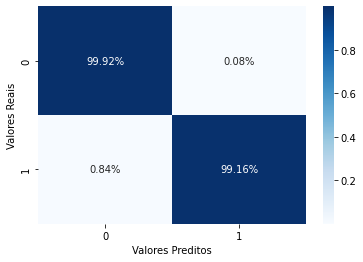

In [ ]:
best_estimator_decision_tree = best_tree['f1'].best_estimator_
y_predict_dec_tree = best_estimator_decision_tree.predict(X_test)

print(classification_report(y_test, y_predict_dec_tree))
matriz_de_confusao(y_test, y_predict_dec_tree)

###Random Forest

Como segundo modelo a ser testado irei utilizar Random Forest, que basicamente é a união de multiplas árvores de decisão para predizer valores. Usarei novamente GridSearchCV para buscar os melhores hiperparâmetros do modelo.

In [ ]:
# Parâmetros a serem buscados
parameters = {
  'criterion': ['gini'], # Como a árvore de decisão teve um melhor resultado usando gini
  'n_estimators': [100, 150], 
  'max_depth': [50, None], 
  'min_samples_split': [2, 4],
}

best_forests = {}
for i, metric in enumerate(metrics):
  
  # Usado para saber qual métrica está sendo testada
  print('\r' + ' ' * 100, end='')
  print('\r {} [{}/{}]'.format(metric, i+1, 4), end='')
  
  # Chamada do GridSearchCV para Random Forest
  random_forest_clf = GridSearchCV(
    RandomForestClassifier(random_state=0), 
    parameters, 
    scoring=metric,
  )

  # Busca os melhores parâmetros para essa métrica 
  random_forest_clf.fit(X_over_train, y_over_train)
  
  # Salva o melhor modelo para essa métrica
  best_forests[metric] = random_forest_clf

In [ ]:
display_best_parameters(best_forests)

,criterion,max_depth,min_samples_split,n_estimators,best_score
accuracy,gini,50,2,100,0.999530
f1,gini,50,2,100,0.999531
precision,gini,50,2,100,0.999062
recall,gini,50,2,100,1.000000


Podemos perceber que para todas as métricas tivemos a mesma combinação de valores para os parâmetros, então não terá diferença entre escolher uma ou outra, então mais uma vez escolherei os melhores parâmetros encontrados da acurácia f1 para predizer os dados de teste.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    259688
           1       0.99      1.00      0.99     22894

    accuracy                           1.00    282582
   macro avg       0.99      1.00      1.00    282582
weighted avg       1.00      1.00      1.00    282582



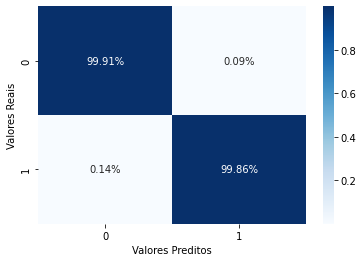

In [ ]:
best_estimator_random_forest = best_forests['f1'].best_estimator_
y_predict_random_forest = best_estimator_random_forest.predict(X_test)

print(classification_report(y_test, y_predict_random_forest))
matriz_de_confusao(y_test, y_predict_random_forest)

###XGBoost

Como terceiro modelo a ser testado irei utilizar o XGBoost, que basicamente é baseado em árvore de decisão e que utiliza uma estrutura de Gradient boosting. É um modelo que costuma obter bons resultados então não poderia deixar de testa-ló. Como o XGBoost é bastante custoso computacionalmente infelizmente não será possível utilizar testar o GridSearchCV para cada uma das métricas, então usarei ele apenas para buscar os melhores hiperparâmetros para a métrica f1.

In [ ]:
# Parâmetros a serem buscadas
parameters = {
  'learning_rate': [0.001, 0.01], 
  'n_estimators': [100, 200], 
  'max_depth': [3, 5],
}

best_xgboost = {}
for i, metric in enumerate(['f1']):
    
  # Chamada do GridSearchCV para XGBoost
  xgboost_clf = GridSearchCV(
    XGBClassifier(random_state=0), 
    parameters, 
    scoring=metric,
  )

  # Busca os melhores parâmetros para essa métrica 
  xgboost_clf.fit(X_over_train, y_over_train)
  
  # Salva o melhor modelo para essa métrica
  best_xgboost[metric] = xgboost_clf

In [ ]:
display_best_parameters(best_xgboost)

,learning_rate,max_depth,n_estimators,best_score
f1,0.001,3,100,0.99953


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    259688
           1       0.99      1.00      0.99     22894

    accuracy                           1.00    282582
   macro avg       0.99      1.00      1.00    282582
weighted avg       1.00      1.00      1.00    282582



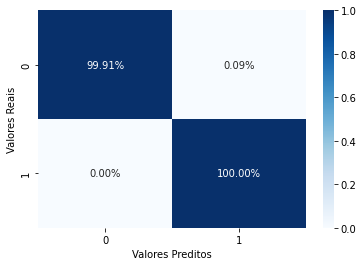

In [ ]:
best_estimator_xgboost = best_xgboost['f1'].best_estimator_
y_predict_xgboost = best_estimator_xgboost.predict(X_test.values)

print(classification_report(y_test, y_predict_xgboost))
matriz_de_confusao(y_test, y_predict_xgboost)

###MLP

Como quarto modelo a ser testado irei utilizar MLP, que é uma rede neural com uma ou mais camadas ocultas com um número indeterminado de neurônios. Dessa vez tenterei usar novamente GridSearchCV para buscar os melhores hiperparâmetros do modelo.

In [ ]:
# Parâmetros a serem buscados
parameters = {  
  'learning_rate_init': [0.001, 0.01],
  'learning_rate': ['invscaling', 'adaptive'],
  'hidden_layer_sizes': [(100,), (50,25)],
}

best_mlps = {}
for i, metric in enumerate(metrics):
  
  # Usado para saber qual métrica está sendo testada
  print('\r' + ' ' * 100, end='')
  print('\r {} [{}/{}]'.format(metric, i+1, len(metrics)), end='')
  
  # Chamada do GridSearchCV para MLP
  mlp_clr = GridSearchCV(
    MLPClassifier(
      random_state=0, shuffle=True, early_stopping=True,
    ), 
    parameters, 
    scoring=metric,
  )

  # Busca os melhores parâmetros para essa métrica 
  mlp_clr.fit(X_over_train, y_over_train)
  
  # Salva o melhor modelo para essa métrica
  best_mlps[metric] = mlp_clr

 recall [4/4]

In [ ]:
display_best_parameters(best_mlps)

,hidden_layer_sizes,learning_rate,learning_rate_init,best_score
accuracy,"(100,)",invscaling,0.001,0.999528
f1,"(100,)",invscaling,0.001,0.999528
precision,"(100,)",invscaling,0.001,0.999060
recall,"(100,)",invscaling,0.001,0.999997


Mais uma vez para todas métricas tivemos a mesma combinação de parâmetros, então não precisarei escolher entre elas, para manter o padrão acima pegarei os melhores parâmetros encontrados da acurácia f1 para predizer os dados de teste.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    259688
           1       0.99      1.00      0.99     22894

    accuracy                           1.00    282582
   macro avg       0.99      1.00      1.00    282582
weighted avg       1.00      1.00      1.00    282582



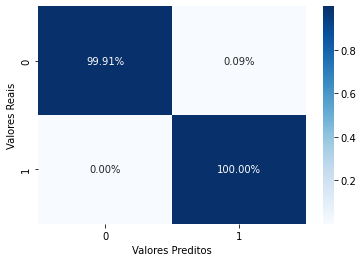

In [ ]:
best_estimator_mlps = best_mlps['f1'].best_estimator_
y_predict_mlp = best_estimator_mlps.predict(X_test)

print(classification_report(y_test, y_predict_mlp))
matriz_de_confusao(y_test, y_predict_mlp)

## Resultados

Os resultados obtidos em ambos modelos me deixaram bastante satisfeito, todos conseguiram uma alta porcentagem de acerto em ambas as classes, acredito que os modelos conseguiram generalizar, principalmente para a classe positiva que significa precisar ser hospitalizado, visto que essa classe era meu principal objetivo de aprendizado para os modelos, aonde com XGBoost e MLP por exemplo conseguimos 100% dos valores preditos corretamente para aqueles casos de pacientes que precisam ser hospitalizados. Boa parte desses bons resultados podem ser explicados principalmente pela grande quantidade de exemplos que o dataset possui mas também por todas etapas de pré-processamento dos dados que apliquei e ajuste dos hiperparâmetros para os modelos.